## Data

In [57]:
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [3]:
pd.read_csv("/Users/arnauddeprest/code/venezuela_fx/venezuela_fx/data/working_df.csv")

,Unnamed: 0,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
0,2007-01-01,5.300000e-02,10.53,18.93,1.464000e+00,1.000000e-03,2416.0,63.0,4.370000e-01,36392.0,157.0,18.4,1.464000e+00,3.1,6.480000e+01,1.000000e-04,1.000000e-01,1.027000e+00,1.800000e-01,3.390000e-05
1,2007-01-02,5.300000e-02,10.12,18.93,1.464000e+00,1.000000e-03,2416.0,63.0,4.370000e-01,36392.0,157.0,18.4,1.464000e+00,3.1,6.480000e+01,1.000000e-04,1.000000e-01,1.027000e+00,1.800000e-01,3.390000e-05
2,2007-01-03,5.360000e-02,10.07,18.24,1.464000e+00,1.000000e-03,2416.0,63.0,4.370000e-01,36392.0,157.0,18.4,1.464000e+00,3.1,6.480000e+01,1.000000e-04,1.000000e-01,1.027000e+00,1.800000e-01,3.403571e-05
3,2007-01-04,5.560000e-02,10.01,14.77,1.464000e+00,1.000000e-03,2416.0,63.0,4.370000e-01,36392.0,157.0,18.4,1.464000e+00,3.1,6.480000e+01,1.000000e-04,1.000000e-01,1.027000e+00,1.800000e-01,3.437500e-05
4,2007-01-05,5.940000e-02,10.03,17.43,1.464000e+00,1.000000e-03,2416.0,63.0,4.370000e-01,36392.0,157.0,18.4,1.464000e+00,3.1,6.480000e+01,1.000000e-04,1.000000e-01,1.027000e+00,1.800000e-01,3.487500e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06
5433,2021-11-16,5.962450e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.690000e+06
5434,2021-11-17,5.968420e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06
5435,2021-11-18,5.998970e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06


In [4]:
df = pd.read_csv("/Users/arnauddeprest/code/venezuela_fx/venezuela_fx/data/working_df.csv").copy()

In [5]:
df.keys()

Index(['Unnamed: 0', 'Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'Dolartoday'],
      dtype='object')

In [6]:
df['Unnamed: 0']= df['Unnamed: 0'].apply(pd.to_datetime)

In [7]:
df.set_index('Unnamed: 0', inplace=True)

## ARIMA model 

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

### drop NA 

In [13]:
# let's keep the last 40% values out for test purposes
train_size = 0.6
index = round(train_size*df.shape[0])
df_train = df.iloc[:index]
df_test = df.iloc[index:]

In [14]:
y_pred = df_test.shift(1)
y_pred

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2015-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-08,1.311730e+01,14.89,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,9.062500e-03
2015-12-09,1.420820e+01,15.09,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,9.093800e-03
2015-12-10,1.465480e+01,15.04,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,8.863600e-03
2015-12-11,1.488520e+01,14.63,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,8.571400e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,6.014640e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.540000e+06
2021-11-16,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06
2021-11-17,5.962450e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.690000e+06


In [15]:
df_test

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,Inflation_Rate,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2015-12-07,1.311730e+01,14.89,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,9.062500e-03
2015-12-08,1.420820e+01,15.09,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,9.093800e-03
2015-12-09,1.465480e+01,15.04,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,8.863600e-03
2015-12-10,1.488520e+01,14.63,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,8.571400e-03
2015-12-11,1.500530e+01,14.72,21.33,3.765700e+01,2.170000e-02,2587.0,70.0,1.516500e+01,14760.0,185.0,172.0,3.765700e+01,11.1,2.387750e+03,2.100000e-03,1.809400e+00,3.695400e+01,4.630000e+00,8.571400e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,5.973510e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06
2021-11-16,5.962450e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.690000e+06
2021-11-17,5.968420e+11,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,1575.3,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06


### y_pross

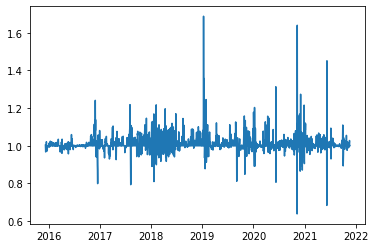

In [16]:
plt.plot(df_test['Dolartoday'].pct_change() + 1)

In [17]:
from sklearn.metrics import r2_score

#y_pross = np.log(df_test['Dolartoday']/df_test['Dolartoday'].shift(1))[1:]
y_pross = np.log(df_test['Dolartoday'])

#y_pross = np.log(df_test['Dolartoday']).diff()
y_true = df_test[1:]
#print(f"R2:{r2_score(y_true, y_pred)}")

In [19]:
y_pred.size

41325

In [20]:
y_true.size

41306

#### Correlation

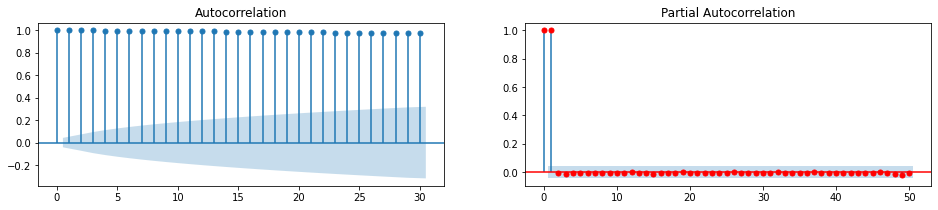

In [22]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(y_pross.dropna(), lags=30, ax=axes[0]);
plot_pacf(y_pross.dropna(), lags=50, ax=axes[1], color='r');

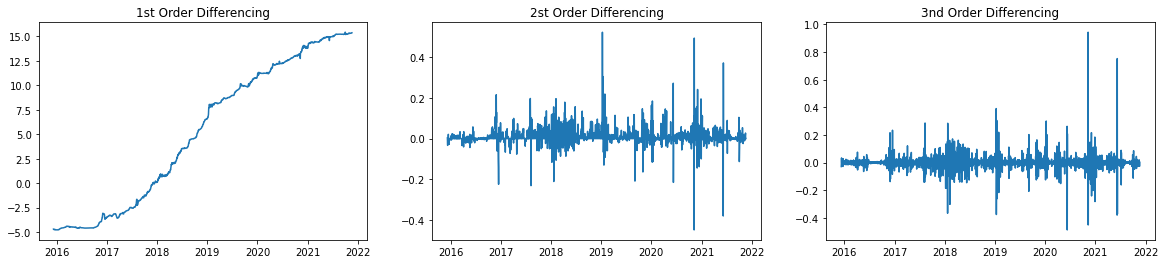

In [23]:
# Let's check the first diffs
zero_diff = y_pross
first_order_diff = y_pross.diff(1)
second_order_diff = y_pross.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('1st Order Differencing')
ax2.plot(first_order_diff); ax2.set_title('2st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('3nd Order Differencing');

In [24]:
from statsmodels.tsa.stattools import adfuller

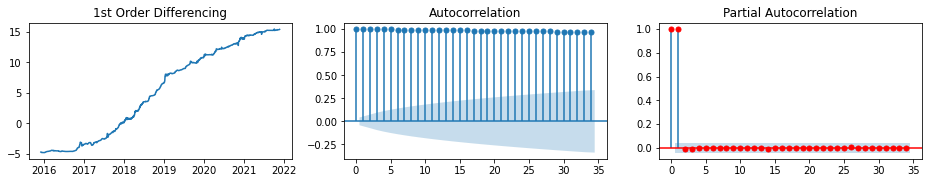

In [25]:
# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_pross[1:]); axes[0].set_title('1st Order Differencing')
plot_acf(y_pross[1:], ax=axes[1]);
plot_pacf(y_pross[1:], ax=axes[2], c='r');


In [26]:
y_pross

Unnamed: 0
2015-12-07    -4.703610
2015-12-08    -4.700162
2015-12-09    -4.725802
2015-12-10    -4.759324
2015-12-11    -4.759324
                ...    
2021-11-15    15.343738
2021-11-16    15.360943
2021-11-17    15.388284
2021-11-18    15.388284
2021-11-19    15.388284
Name: Dolartoday, Length: 2175, dtype: float64

#### Arima summary

In [112]:
#from statsmodels.tsa.arima.model.ARIMA import ARIMA #statsmodels 0.11
#from statsmodels.tsa.arima.model import ARIMA #statsmodels 0.12
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(y_pross, order=(2, 2, 1))

# 2. fit the models
arima = arima.fit()

arima.summary()

#arima = ARIMA(y_pred, order=(2,2,0))
#arima = arima.fit()
#arima.summary()

/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73806D+00    |proj g|=  1.30197D+01

At iterate    5    f= -1.73811D+00    |proj g|=  1.33549D-01

At iterate   10    f= -1.73811D+00    |proj g|=  2.11696D+00

At iterate   15    f= -1.73820D+00    |proj g|=  8.99843D+00

At iterate   20    f= -1.73823D+00    |proj g|=  2.05989D-02

At iterate   25    f= -1.73824D+00    |proj g|=  2.89825D+00


 This problem is unconstrained.



At iterate   30    f= -1.73885D+00    |proj g|=  2.61549D+01

At iterate   35    f= -1.73991D+00    |proj g|=  3.08918D+00

At iterate   40    f= -1.73992D+00    |proj g|=  8.67122D-01

At iterate   45    f= -1.73994D+00    |proj g|=  5.19583D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     72      1     0     0   3.998D-02  -1.740D+00
  F =  -1.7399386024316235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Dolartoday   No. Observations:                 2173
Model:                 ARIMA(2, 2, 1)   Log Likelihood                3780.887
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 24 Nov 2021   AIC                          -7551.773
Time:                        16:28:07   BIC                          -7523.354
Sample:                    12-09-2015   HQIC                         -7541.382
                         - 11-19-2021                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.026e-06   7.04e-06      0.146      0.884   -1.28e-05    1.48e-05
ar.L1.D2.Dolartoday     0.1131      0.022      5.251      0.000       0.071       0.155
ar.L2.D2.Dolartoday     0.0462      0.022      2.144      0.032       0.004       0.088
ma.L1.D2.Dolartoday    -0.9940      0.002   -464.403      0.000      -0.998      -0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5883           +0.0000j            3.5883            0.0000
AR.2           -6.0377           +0.0000j            6.0377            0.5000
MA.1            1.0060           +0.0000j            1.0060            0.0000
-----------------------------------------------------------------------------
"""

In [113]:
import pmdarima as pm
smodel = pm.auto_arima(y_pross,
                       start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-6306.570, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-6837.750, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-6308.570, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-7016.942, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-7540.779, Time=0.88 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0] intercept
Total fit time: 5.590 seconds


### Prediction

In [114]:
import statsmodels.api as sm

In [115]:
len(y_pross)

2175

In [120]:
y_pred = arima.predict(start=2175-30)

In [123]:
y_pred

2021-10-21   -0.016787
2021-10-22    0.004799
2021-10-23    0.003685
2021-10-24    0.003663
2021-10-25   -0.000446
2021-10-26   -0.004259
2021-10-27   -0.043108
2021-10-28   -0.003120
2021-10-29    0.021668
2021-10-30    0.002920
2021-10-31    0.003805
2021-11-01    0.025295
2021-11-02    0.004488
2021-11-03   -0.014176
2021-11-04    0.000738
2021-11-05    0.009720
2021-11-06    0.003326
2021-11-07    0.003613
2021-11-08    0.007499
2021-11-09   -0.002510
2021-11-10   -0.009638
2021-11-11    0.013958
2021-11-12    0.001101
2021-11-13    0.003635
2021-11-14    0.003513
2021-11-15    0.007365
2021-11-16   -0.010233
2021-11-17   -0.010939
2021-11-18   -0.019714
2021-11-19    0.004959
Freq: D, dtype: float64

/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


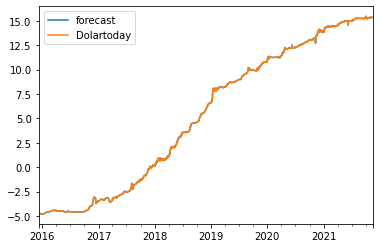

In [124]:
arima.plot_predict(dynamic=False);

In [110]:
y_train

Unnamed: 0
2015-12-07   -4.703610
2015-12-08   -4.700162
2015-12-09   -4.725802
2015-12-10   -4.759324
2015-12-11   -4.759324
                ...   
2016-02-25   -4.519304
2016-02-26   -4.519304
2016-02-27   -4.519304
2016-02-28   -4.519304
2016-02-29   -4.519304
Name: Dolartoday, Length: 85, dtype: float64

In [108]:
y_train = y_pross[:85]
y_test = y_pross[85:]
arima = ARIMA(y_train, order=(2, 2, 1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26918D+00    |proj g|=  6.34226D+00

At iterate    5    f= -3.26952D+00    |proj g|=  8.58905D-01

At iterate   10    f= -3.27076D+00    |proj g|=  1.05490D+01

At iterate   15    f= -3.27350D+00    |proj g|=  5.34253D-02

At iterate   20    f= -3.27422D+00    |proj g|=  8.10582D+00

At iterate   25    f= -3.29960D+00    |proj g|=  1.42523D+00

At iterate   30    f= -3.30943D+00    |proj g|=  1.02020D+00

At iterate   35    f= -3.30945D+00    |proj g|=  2.07183D+00

At iterate   40    f= -3.31116D+00    |proj g|=  2.37354D+01

At iterate   45    f= -3.32914D+00    |proj g|=  1.20865D+01

At iterate   50    f= -3.33138D+00    |proj g|=  8.93606D-01

At iterate   55    f= -3.33163D+00    |proj g|=  1.18855D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [109]:
(forecast, stderr, conf_int) = arima.forecast(3, alpha=0.05)

In [34]:
conf_int

array([[-4.5314022 , -4.49785446],
       [-4.53662476, -4.48090084],
       [-4.53883388, -4.46800174]])

In [35]:
forecast = pd.Series(forecast, name='forecast')
stderr = pd.Series(stderr)
conf_int = pd.DataFrame(conf_int, columns=['low', 'high'])

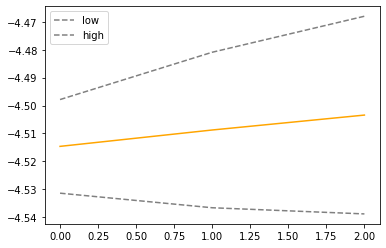

In [36]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend()

/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


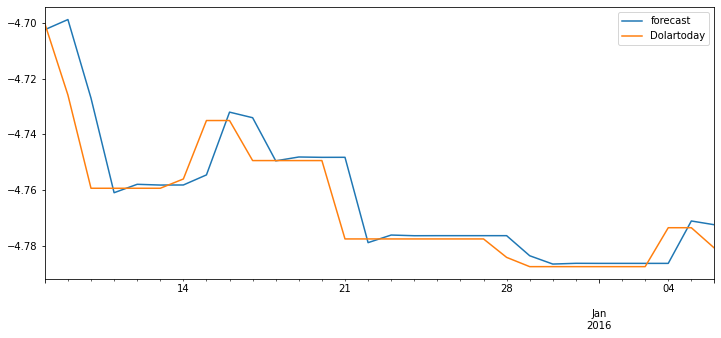

In [42]:
arima.plot_predict(end=30);
fig = plt.gcf(); fig.set_size_inches(12, 5);

#### Forecast VS Actual

In [149]:
# Create a correct Training/Test split to predict the last 50 points
train = y_pross[:-30]
test = y_pross[-30:]



# Build Model
arima = ARIMA(train, order=(2, 2, 1))  
arima = arima.fit()

# Forecast
forecast, std_err, confidence_int = arima.forecast(len(test), alpha=0.05)  # 95% confidence

/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/arnauddeprest/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73185D+00    |proj g|=  1.29864D+01

At iterate    5    f= -1.73190D+00    |proj g|=  1.30674D-01

At iterate   10    f= -1.73191D+00    |proj g|=  2.06887D+00

At iterate   15    f= -1.73199D+00    |proj g|=  9.00451D+00

At iterate   20    f= -1.73203D+00    |proj g|=  2.13396D-02

At iterate   25    f= -1.73203D+00    |proj g|=  2.05087D+00

At iterate   30    f= -1.73236D+00    |proj g|=  2.16260D+01

At iterate   35    f= -1.73368D+00    |proj g|=  1.56432D+01

At iterate   40    f= -1.73370D+00    |proj g|=  5.75251D-03

At iterate   45    f= -1.73370D+00    |proj g|=  4.66331D-01

At iterate   50    f= -1.73371D+00    |proj g|=  2.24397D+00

At iterate   55    f= -1.73373D+00    |proj g|=  8.49192D-02

At iterate   60    f= -1.73373D+00    |proj g|=  1.38241D-03

           * * *

Tit   = 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [164]:
from datetime import datetime

In [184]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.xlim(datetime(2020, 10, 10), datetime(2021, 11,30))
    plt.ylim(12,16)
    plt.legend(loc='upper left', fontsize=8);


In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_pross[(2175-31):2174], y_pred)

15.324353531787299

In [186]:
y_pross.mean()

5.209742705465528

In [187]:
y_pross[(2175-31):2174]

Unnamed: 0
2021-10-20    15.274126
2021-10-21    15.274126
2021-10-22    15.274126
2021-10-23    15.274126
2021-10-24    15.278766
2021-10-25    15.287983
2021-10-26    15.341567
2021-10-27    15.352378
2021-10-28    15.332833
2021-10-29    15.332833
2021-10-30    15.332833
2021-10-31    15.308415
2021-11-01    15.306165
2021-11-02    15.326232
2021-11-03    15.330638
2021-11-04    15.324023
2021-11-05    15.324023
2021-11-06    15.324023
2021-11-07    15.319588
2021-11-08    15.326232
2021-11-09    15.341567
2021-11-10    15.330638
2021-11-11    15.332833
2021-11-12    15.332833
2021-11-13    15.332833
2021-11-14    15.328438
2021-11-15    15.343738
2021-11-16    15.360943
2021-11-17    15.388284
2021-11-18    15.388284
Name: Dolartoday, dtype: float64

In [188]:
forecast

array([15.28088261, 15.28651021, 15.29122767, 15.29579048, 15.30029423,
       15.30478501, 15.30927248, 15.3137599 , 15.31824807, 15.32273725,
       15.32722749, 15.33171882, 15.33621125, 15.34070477, 15.34519938,
       15.34969509, 15.3541919 , 15.35868979, 15.36318879, 15.36768888,
       15.37219006, 15.37669234, 15.38119571, 15.38570018, 15.39020574,
       15.3947124 , 15.39922015, 15.403729  , 15.40823894, 15.41274998])

In [189]:
np.array(test)

array([15.27412558, 15.27412558, 15.27412558, 15.27876596, 15.28798262,
       15.34156686, 15.35237778, 15.33283318, 15.33283318, 15.33283318,
       15.30841465, 15.30616493, 15.3262325 , 15.33063779, 15.32402255,
       15.32402255, 15.32402255, 15.31958795, 15.3262325 , 15.34156686,
       15.33063779, 15.33283318, 15.33283318, 15.33283318, 15.32843757,
       15.34373841, 15.36094314, 15.38828449, 15.38828449, 15.38828449])

In [190]:
train

Unnamed: 0
2015-12-07    -4.703610
2015-12-08    -4.700162
2015-12-09    -4.725802
2015-12-10    -4.759324
2015-12-11    -4.759324
                ...    
2021-10-16    15.233788
2021-10-17    15.236206
2021-10-18    15.243427
2021-10-19    15.250595
2021-10-20    15.274126
Name: Dolartoday, Length: 2145, dtype: float64

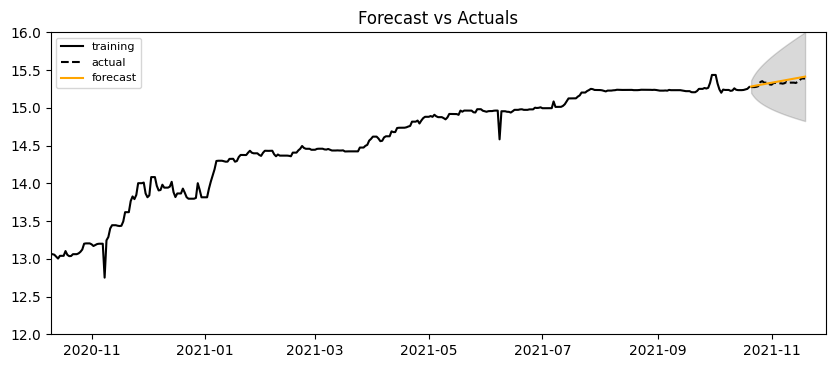

In [191]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

In [163]:
test

Unnamed: 0
2021-10-21    15.274126
2021-10-22    15.274126
2021-10-23    15.274126
2021-10-24    15.278766
2021-10-25    15.287983
2021-10-26    15.341567
2021-10-27    15.352378
2021-10-28    15.332833
2021-10-29    15.332833
2021-10-30    15.332833
2021-10-31    15.308415
2021-11-01    15.306165
2021-11-02    15.326232
2021-11-03    15.330638
2021-11-04    15.324023
2021-11-05    15.324023
2021-11-06    15.324023
2021-11-07    15.319588
2021-11-08    15.326232
2021-11-09    15.341567
2021-11-10    15.330638
2021-11-11    15.332833
2021-11-12    15.332833
2021-11-13    15.332833
2021-11-14    15.328438
2021-11-15    15.343738
2021-11-16    15.360943
2021-11-17    15.388284
2021-11-18    15.388284
2021-11-19    15.388284
Name: Dolartoday, dtype: float64

In [160]:
forecast

array([15.28088261, 15.28651021, 15.29122767, 15.29579048, 15.30029423,
       15.30478501, 15.30927248, 15.3137599 , 15.31824807, 15.32273725,
       15.32722749, 15.33171882, 15.33621125, 15.34070477, 15.34519938,
       15.34969509, 15.3541919 , 15.35868979, 15.36318879, 15.36768888,
       15.37219006, 15.37669234, 15.38119571, 15.38570018, 15.39020574,
       15.3947124 , 15.39922015, 15.403729  , 15.40823894, 15.41274998])

In [156]:
mean_squared_error(forecast,test)

0.0009841040352208336

In [157]:
mean_absolute_error(forecast,test)

0.02767857503398267

#### Residual / Density

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

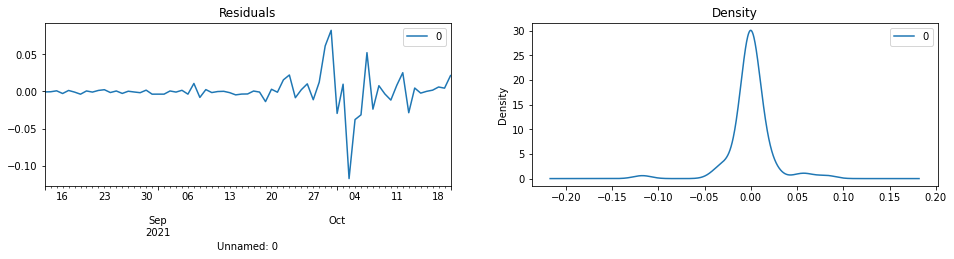

In [55]:
residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])